In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

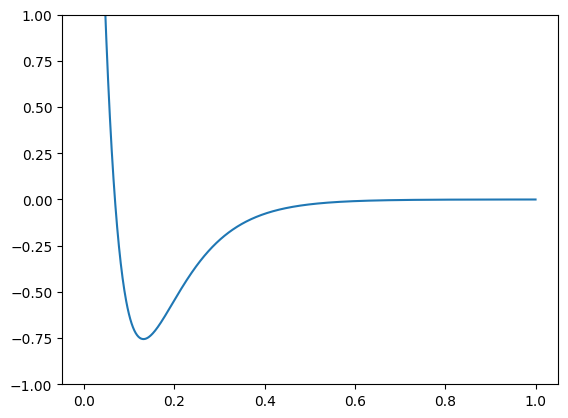

In [3]:
m, D, alpha, r0 = 940e6, 0.755501, 1.44, 0.131349
hbar2_2m = 2.07e-3

N, r_max = 1000, 1
dr = r_max / N
r = np.linspace(dr, r_max, N)

r_prime = (r - r0) / r0
V = D * (np.exp(-2 * alpha * r_prime) - 2 * np.exp(-alpha * r_prime))

plt.ylim([-1,1])
plt.plot(r, V)

Lowest Vibrational Energy: -0.383 eV


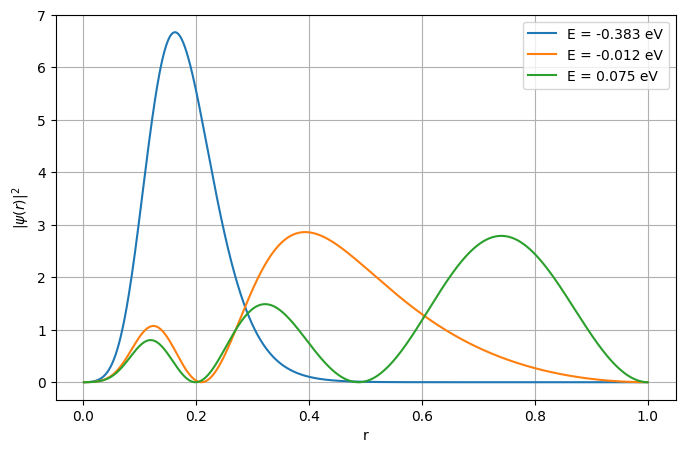

In [4]:
diags = hbar2_2m * (2 / dr**2) + V
off_diags = np.full(N - 1, -hbar2_2m / dr**2)
H = np.diag(diags) + np.diag(off_diags, -1) + np.diag(off_diags, 1)

val, vec = eigh(H)
print(f"Lowest Vibrational Energy: {val[0]:.3f} eV")

n = 3
plt.figure(figsize=(8, 5))
for i in range(n):
    E = val[i]
    psi = vec[:, i] / np.sqrt(dr)
    plt.plot(r, psi**2, label=f"E = {E:.3f} eV")

plt.xlabel("r")
plt.ylabel("$|\psi(r)|^2$")
plt.legend()
plt.grid()
plt.show()


In [5]:
val[:3]

array([-0.38348864, -0.01225519,  0.0745097 ])